In [39]:
!pip install insightface opencv-python numpy


In [40]:
!python.exe -m pip install --upgrade pip

**Using ArcFace For Suspect Recognition**

D:\EtinoXa\Interpreters\Python\Projects\ai_forensics\.venv\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\scott/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\scott/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\scott/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\scott/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\scott/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

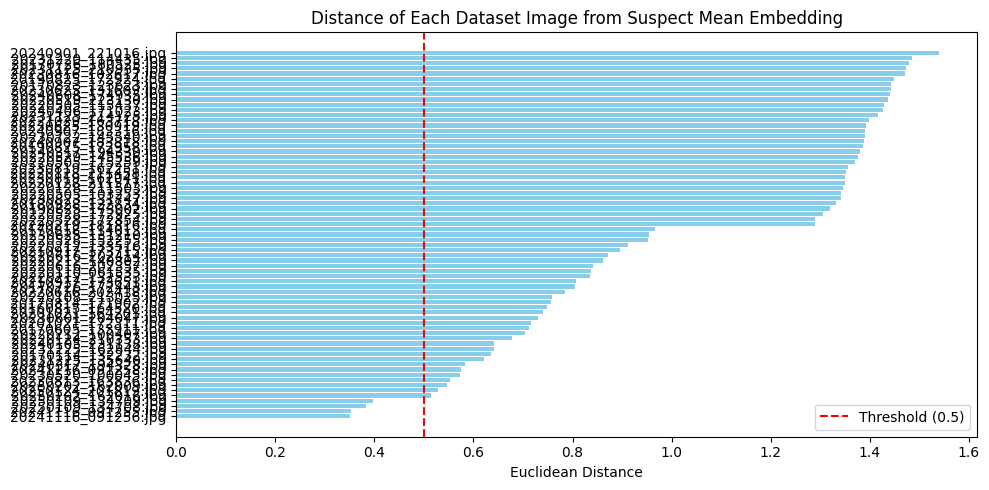

✅ Copied 20241116_091255.jpg to ./matched_images\threshold_0.5
✅ Copied 20241116_091256.jpg to ./matched_images\threshold_0.5
✅ Copied 20250109_134708.jpg to ./matched_images\threshold_0.5
✅ Copied 20250109_134709.jpg to ./matched_images\threshold_0.5

=== Processing Threshold: 0.7 ===
[NO MATCH] 20160815_164520.jpg (Distance: 0.749)
[MATCH] 20170114_132232.jpg (Distance: 0.635)
[NO MATCH] 20170605_133911.jpg (Distance: 0.712)
[NO MATCH] 20170726_172443.jpg (Distance: 0.805)
[NO MATCH] 20170726_180525.jpg (Distance: 1.479)
[NO MATCH] 20170814_171902.jpg (Distance: 0.756)
[NO MATCH] 20170818_114013.jpg (Distance: 0.967)
[NO MATCH] 20170823_123623.jpg (Distance: 1.444)
[NO MATCH] 20180928_122834.jpg (Distance: 1.332)
[NO MATCH] 20190825_172924.jpg (Distance: 1.449)
[NO MATCH] 20190825_172958.jpg (Distance: 1.388)
[NO MATCH] 20190825_173002.jpg (Distance: 1.320)
[NO MATCH] 20201021_164201.jpg (Distance: 0.740)
[NO MATCH] 20201021_172311.jpg (Distance: 0.716)
[NO MATCH] 20210917_173651.jpg

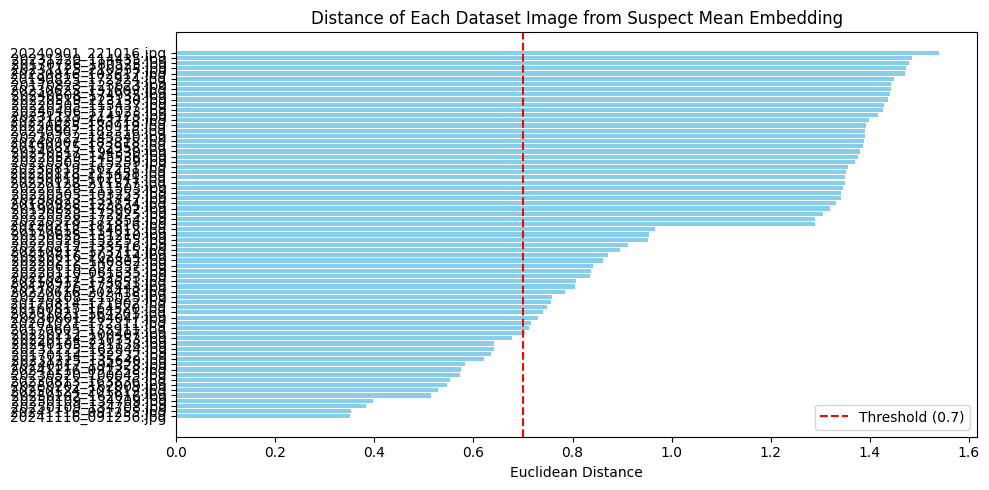

✅ Copied 20170114_132232.jpg to ./matched_images\threshold_0.7
✅ Copied 20220124_210353.jpg to ./matched_images\threshold_0.7
✅ Copied 20230520_100045.jpg to ./matched_images\threshold_0.7
✅ Copied 20230813_163836.jpg to ./matched_images\threshold_0.7
✅ Copied 20231225_135640.jpg to ./matched_images\threshold_0.7
✅ Copied 20231225_162844.jpg to ./matched_images\threshold_0.7
✅ Copied 20240105_231138.jpg to ./matched_images\threshold_0.7
✅ Copied 20240317_194328.jpg to ./matched_images\threshold_0.7
✅ Copied 20241116_091255.jpg to ./matched_images\threshold_0.7
✅ Copied 20241116_091256.jpg to ./matched_images\threshold_0.7
✅ Copied 20241116_091258.jpg to ./matched_images\threshold_0.7
✅ Copied 20250109_134708.jpg to ./matched_images\threshold_0.7
✅ Copied 20250109_134709.jpg to ./matched_images\threshold_0.7
✅ Copied 20250124_201819.jpg to ./matched_images\threshold_0.7
✅ Copied 20250202_162009.jpg to ./matched_images\threshold_0.7
✅ Copied 20250202_162016.jpg to ./matched_images\thresh

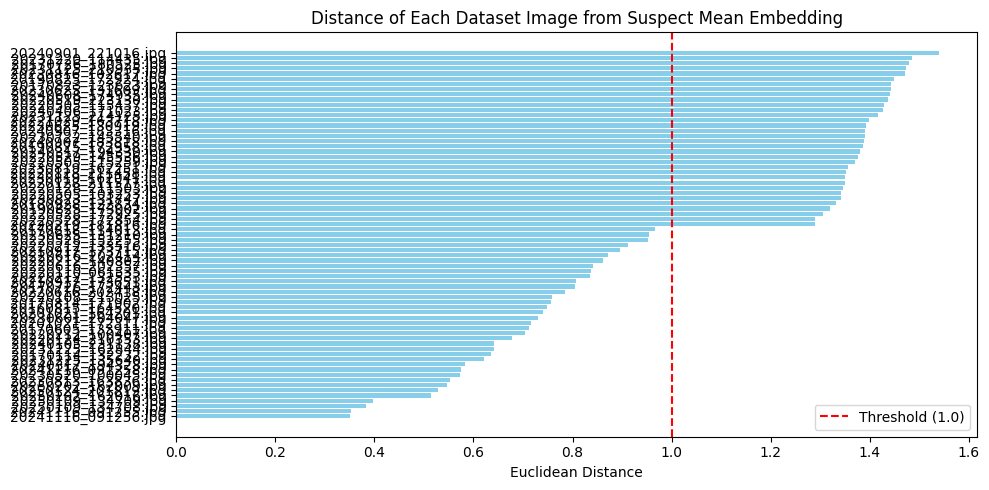

✅ Copied 20160815_164520.jpg to ./matched_images\threshold_1.0
✅ Copied 20170114_132232.jpg to ./matched_images\threshold_1.0
✅ Copied 20170605_133911.jpg to ./matched_images\threshold_1.0
✅ Copied 20170726_172443.jpg to ./matched_images\threshold_1.0
✅ Copied 20170814_171902.jpg to ./matched_images\threshold_1.0
✅ Copied 20170818_114013.jpg to ./matched_images\threshold_1.0
✅ Copied 20201021_164201.jpg to ./matched_images\threshold_1.0
✅ Copied 20201021_172311.jpg to ./matched_images\threshold_1.0
✅ Copied 20210917_173651.jpg to ./matched_images\threshold_1.0
✅ Copied 20210917_173715.jpg to ./matched_images\threshold_1.0
✅ Copied 20220108_213025.jpg to ./matched_images\threshold_1.0
✅ Copied 20220110_061535.jpg to ./matched_images\threshold_1.0
✅ Copied 20220124_210353.jpg to ./matched_images\threshold_1.0
✅ Copied 20220212_100407.jpg to ./matched_images\threshold_1.0
✅ Copied 20220212_132533.jpg to ./matched_images\threshold_1.0
✅ Copied 20220212_133516.jpg to ./matched_images\thresh

In [1]:
# https://github.com/deepinsight/insightface/tree/master/model_zoo
import insightface
from insightface.app import FaceAnalysis
import cv2
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
import time
from datetime import datetime

# === Initialize ArcFace ===
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))


# === Get a Single Face Embedding ===
def get_aligned_embedding(img_path):
    img = cv2.imread(img_path)
    faces = app.get(img)
    if not faces:
        print(f"[!] No face found in {img_path}")
        return None
    embedding = faces[0].embedding
    return embedding


# === Get Mean Embedding from a Folder ===
def get_mean_embedding_from_folder(folder_path):
    embeddings = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        emb = get_aligned_embedding(img_path)
        if emb is not None:
            emb = emb / np.linalg.norm(emb)  # Normalize
            embeddings.append(emb)
        else:
            print(f"[!] Skipped {img_path} (no face detected)")
    if len(embeddings) == 0:
        raise ValueError("No valid embeddings found in the folder.")
    mean_emb = np.mean(embeddings, axis=0)
    mean_emb = mean_emb / np.linalg.norm(mean_emb)
    print(f"✅ Mean embedding computed from {len(embeddings)} images.")
    return mean_emb, len(embeddings)


# === Match Dataset Embeddings to Suspect ===
def match_embeddings(suspect_embedding, dataset_folder, threshold=0.5):
    matches = []
    distances = []
    processed_count = 0

    for img_name in os.listdir(dataset_folder):
        img_path = os.path.join(dataset_folder, img_name)
        target_embedding = get_aligned_embedding(img_path)
        if target_embedding is not None:
            target_embedding = target_embedding / np.linalg.norm(target_embedding)
            dist = np.linalg.norm(suspect_embedding - target_embedding)
            distances.append((img_name, dist))
            processed_count += 1
            if dist < threshold:
                print(f"[MATCH] {img_name} (Distance: {dist:.3f})")
                matches.append((img_name, dist, img_path))
            else:
                print(f"[NO MATCH] {img_name} (Distance: {dist:.3f})")
    return matches, distances, processed_count


# === Plot Distances ===
def plot_distances(distances, threshold):
    distances_sorted = sorted(distances, key=lambda x: x[1])
    labels, dists = zip(*[(x[0], x[1]) for x in distances_sorted])
    plt.figure(figsize=(10, 5))
    plt.barh(labels, dists, color='skyblue')
    plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold ({threshold})')
    plt.xlabel('Euclidean Distance')
    plt.title('Distance of Each Dataset Image from Suspect Mean Embedding')
    plt.legend()
    plt.tight_layout()
    plt.show()


# === Copy Matched Images to Folder ===
def copy_matches(matches, source_folder, destination_folder):
    os.makedirs(destination_folder, exist_ok=True)
    for img_name, dist, _ in matches:
        src = os.path.join(source_folder, img_name)
        dst = os.path.join(destination_folder, img_name)
        shutil.copy2(src, dst)
        print(f"✅ Copied {img_name} to {destination_folder}")

# === Main Pipeline with Multiple Thresholds ===
def run_face_match_pipeline_with_thresholds(suspect_folder, dataset_folder, match_folder_base, thresholds):
    start_time = time.time()
    print(f"\n🚀 Run started at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

    # Compute the mean embedding for the suspect folder
    suspect_embedding, suspect_count = get_mean_embedding_from_folder(suspect_folder)

    for threshold in thresholds:
        print(f"\n=== Processing Threshold: {threshold} ===")
        match_folder = os.path.join(match_folder_base, f"threshold_{threshold}")
        os.makedirs(match_folder, exist_ok=True)

        # Match embeddings and process results
        matches, distances, processed_count = match_embeddings(suspect_embedding, dataset_folder, threshold=threshold)

        print("\n=== Matches Found ===")
        for match in matches:
            print(f"Image: {match[0]}, Distance: {match[1]:.3f}")

        # Plot distances and copy matches to the folder
        plot_distances(distances, threshold)
        copy_matches(matches, dataset_folder, match_folder)

    elapsed_time = time.time() - start_time

    # Print final detailed output
    print("\n=== FINAL REPORT ===")
    print(f"Thresholds used: {thresholds}")
    print(f"Total suspect images: {suspect_count}")
    print(f"Total dataset images processed: {processed_count}")
    print(f"Time used: {elapsed_time:.2f} seconds")
    print("======================")

# === Run with Multiple Thresholds ===
suspect_folder = './suspect_images'               # Folder of suspect images
dataset_folder = './suspect_gallery_images'      # Folder of images to search
match_folder_base = './matched_images'           # Base folder to save matched images
thresholds = [0.5, 0.7, 1.0]                     # Array of thresholds for matching

run_face_match_pipeline_with_thresholds(suspect_folder, dataset_folder, match_folder_base, thresholds)

#TODO: Concurrent processing of thresholds
#TODO: Object Detection for suspect images
#TODO: Video Detection
